## Limpieza de Datos

La fase de limpieza implica preparar los datos sin procesar para que sean adecuados para el análisis, abordando problemas comunes que pueden comprometer la calidad de los resultados.

1. Importar librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

2. Este código descarga el dataset "Breast Cancer" de Kaggle, subido por el usuario "reihanenamdari", y luego imprime la ubicación de los archivos descargados en tu computadora.

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("reihanenamdari/breast-cancer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\InvitadoLaptop\.cache\kagglehub\datasets\reihanenamdari\breast-cancer\versions\1


3. Cargar el archivo CSV en un DataFrame y explorarlo.

In [4]:
df_dataSet = pd.read_csv("breast_cancer.csv")

df_dataSet.sample(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3444,59,White,Married,T1,N1,IIA,Well differentiated,1,Regional,7,Positive,Negative,3,1,79,Alive
712,54,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,26,Positive,Positive,19,1,57,Alive
1731,61,Black,Widowed,T2,N3,IIIC,Poorly differentiated,3,Regional,47,Positive,Positive,21,21,4,Dead


4. Usamos "shape" para obtener las dimensiones del DataFrame.

In [5]:
df_dataSet.shape

(4024, 16)

5. Información general del DataFrame
Usamos el método '.info()' para obtener un resumen del DataFrame, incluyendo el número de filas, columnas y tipos de datos.

In [6]:
df_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

6. Reemplazar " anaplastic; Grade IV" y cambiar a "integer"

In [7]:
df_dataSet["Grade"] = df_dataSet["Grade"].replace({" anaplastic; Grade IV": "4"}).astype(int)

In [8]:
df_dataSet["Grade"].value_counts()

Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

7. Renombrar columna "T Stage " por "T Stage".

In [9]:
df_dataSet = df_dataSet.rename(columns={"T Stage ": "T Stage"})

In [10]:
df_dataSet.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

8. Eliminar "N" y "T Stage", cambiar a "integer"

In [11]:
def limpiar_columna(serie):

    return (
        serie
        .astype(str)           # aseguro que todo sea string
        .str.replace("N", "")  # quitar "N"
        .str.replace("T", "")  # quitar "T"
        .astype(int)         # convierto a número 
    )

In [12]:
columnas_a_convertir = ['T Stage', 'N Stage']

for col in columnas_a_convertir:
    df_dataSet[col] = limpiar_columna(df_dataSet[col])

In [13]:
df_dataSet[columnas_a_convertir].sample(3)

,T Stage,N Stage
1783,2,1
1607,1,1
473,2,2


In [14]:
df_dataSet.sample(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
3720,40,Black,Single,2,1,IIB,Poorly differentiated,3,Regional,28,Negative,Negative,20,1,55,Alive
3530,52,White,Married,2,1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,17,2,76,Alive
1246,56,White,Married,3,3,IIIC,Moderately differentiated,2,Regional,70,Negative,Negative,26,26,18,Dead


In [15]:
df_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   int32 
 4   N Stage                 4024 non-null   int32 
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   int32 
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

9. Guardar nuevo "CSV" y "XSLX"

In [16]:
df_dataSet.to_csv("data_BreastCancer.csv")

In [17]:
df_dataSet.to_csv("data_BreastCancer.xlsx")

### Gráficas de relación

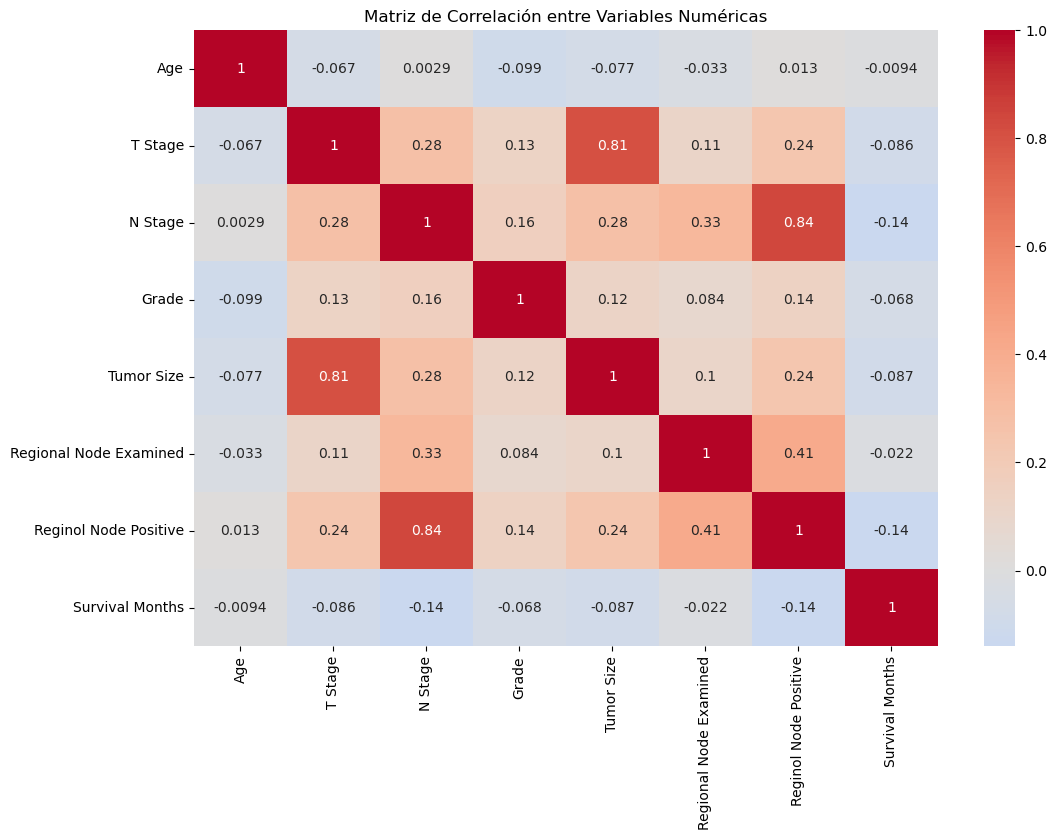

In [18]:
numeric_cols = ["Age", "T Stage", "N Stage", "Grade", "Tumor Size", "Regional Node Examined", "Reginol Node Positive", "Survival Months"]
plt.figure(figsize=(12, 8))
sns.heatmap(df_dataSet[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

## Para correlacional en PoweBI
- N Stage con Reginol Node Positive 
- Tumor Size con T Stage

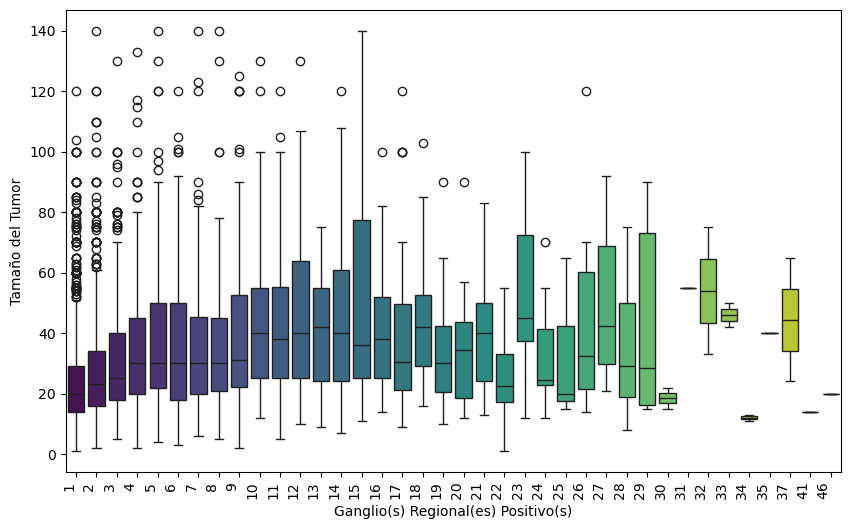

In [33]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Reginol Node Positive",
            y="Tumor Size",
            data=df_dataSet,
            palette='viridis')

plt.xlabel("Ganglio(s) Regional(es) Positivo(s)")
plt.ylabel("Tamaño del Tumor")
plt.xticks(rotation=90, ha='right')

plt.show()

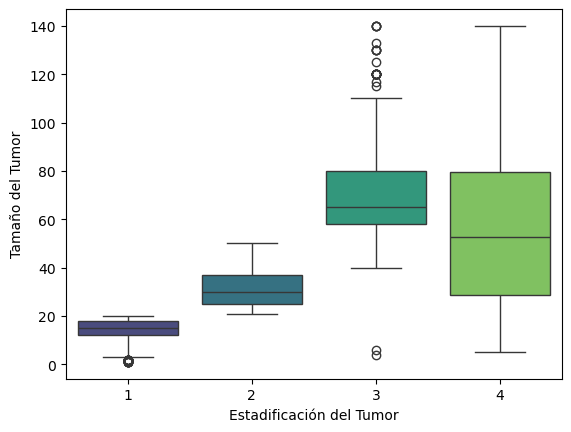

In [34]:
sns.boxplot(x="T Stage",
            y="Tumor Size",
            data=df_dataSet,
            palette='viridis')

plt.xlabel("Estadificación del Tumor")
plt.ylabel("Tamaño del Tumor")
plt.show()